In [111]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI2 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI2")
X_train = DKI2.index.values.reshape(-1, 1)
y_train = DKI2['O3'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['O3'].min()
max_par = DKI2['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.104
MSE: 0.011
MAE: 0.090
R-Squared: -2.498
       Tanggal         O3
0   2022-11-30  27.074236
1   2022-12-01  27.510917
2   2022-12-02  27.510917
3   2022-12-03  27.947598
4   2022-12-04  28.122271
5   2022-12-05  28.122271
6   2022-12-06  28.384279
7   2022-12-07  28.820961
8   2022-12-08  28.820961
9   2022-12-09  29.257642
10  2022-12-10  29.257642
11  2022-12-11  29.694323
12  2022-12-12  29.694323
13  2022-12-13  29.694323
14  2022-12-14  29.781659
15  2022-12-15  29.781659
16  2022-12-16  29.781659
17  2022-12-17  30.131004
18  2022-12-18  30.131004
19  2022-12-19  30.131004
20  2022-12-20  30.567686
21  2022-12-21  30.567686
22  2022-12-22  30.567686
23  2022-12-23  30.567686
24  2022-12-24  30.567686
25  2022-12-25  31.004367
26  2022-12-26  31.004367
27  2022-12-27  31.004367
28  2022-12-28  31.004367
29  2022-12-29  31.004367


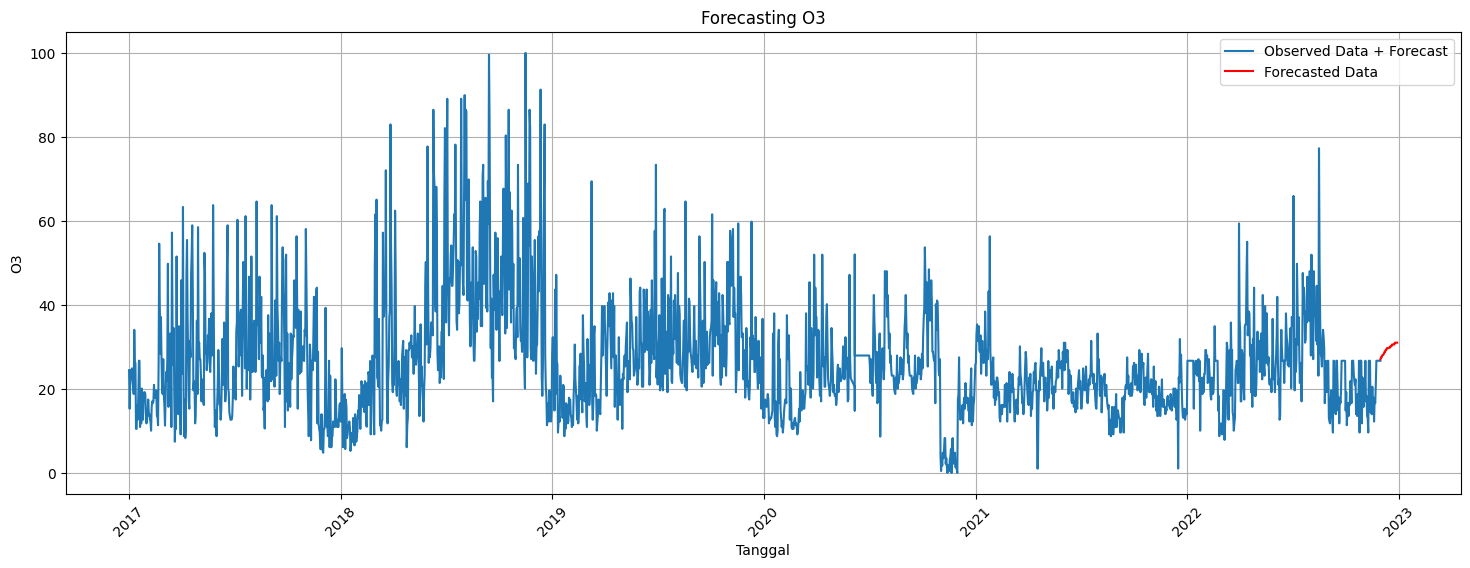

In [113]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['O3'].min()
max_par = DKI2['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.114
MSE: 0.013
MAE: 0.100
R-Squared: -3.185
       Tanggal         O3
0   2022-11-30  27.947598
1   2022-12-01  27.947598
2   2022-12-02  27.074236
3   2022-12-03  26.637555
4   2022-12-04  26.200873
5   2022-12-05  26.637555
6   2022-12-06  27.947598
7   2022-12-07  28.820961
8   2022-12-08  30.131004
9   2022-12-09  31.004367
10  2022-12-10  31.441048
11  2022-12-11  31.877729
12  2022-12-12  31.877729
13  2022-12-13  31.877729
14  2022-12-14  31.877729
15  2022-12-15  31.877729
16  2022-12-16  31.877729
17  2022-12-17  31.877729
18  2022-12-18  31.877729
19  2022-12-19  31.877729
20  2022-12-20  31.877729
21  2022-12-21  31.877729
22  2022-12-22  31.877729
23  2022-12-23  31.877729
24  2022-12-24  31.877729
25  2022-12-25  31.877729
26  2022-12-26  31.877729
27  2022-12-27  31.877729
28  2022-12-28  31.877729
29  2022-12-29  31.877729


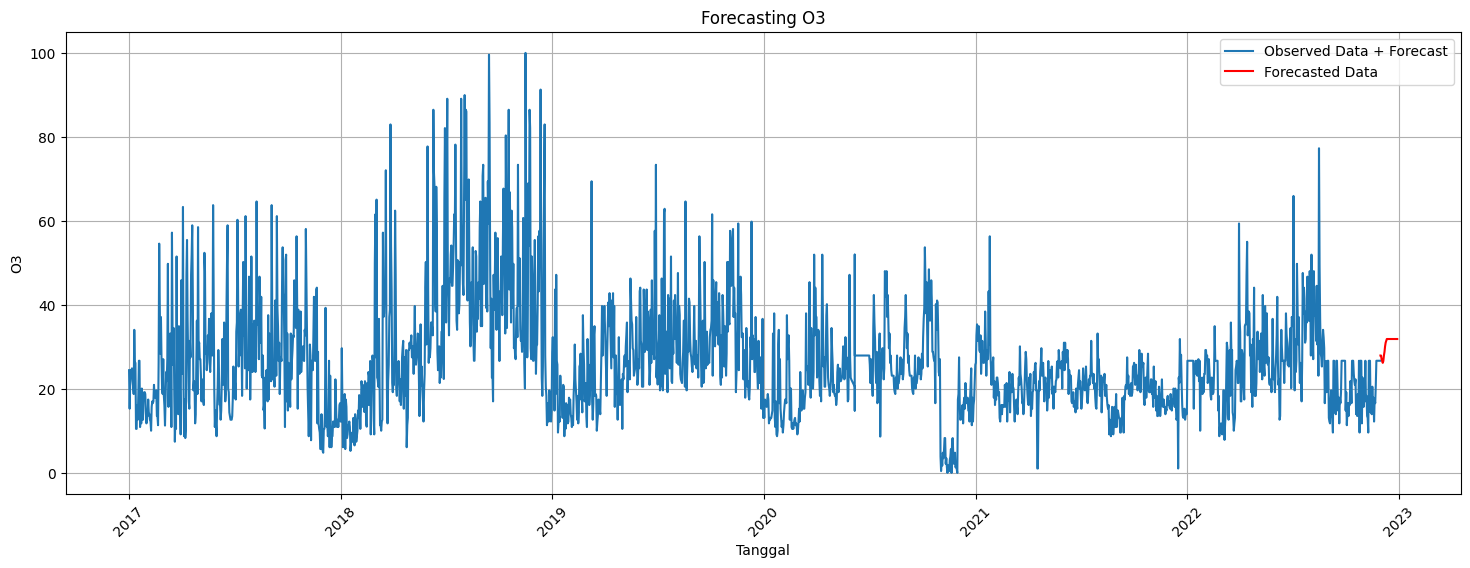

In [115]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['O3'].min()
max_par = DKI2['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.066
MSE: 0.004
MAE: 0.054
R-Squared: -0.395
       Tanggal         O3
0   2022-11-30  17.205240
1   2022-12-01  17.205240
2   2022-12-02  17.205240
3   2022-12-03  17.205240
4   2022-12-04  17.205240
5   2022-12-05  17.205240
6   2022-12-06  17.205240
7   2022-12-07  17.205240
8   2022-12-08  17.205240
9   2022-12-09  17.205240
10  2022-12-10  17.205240
11  2022-12-11  17.030568
12  2022-12-12  17.030568
13  2022-12-13  17.030568
14  2022-12-14  17.030568
15  2022-12-15  17.030568
16  2022-12-16  17.030568
17  2022-12-17  17.030568
18  2022-12-18  17.030568
19  2022-12-19  17.030568
20  2022-12-20  17.030568
21  2022-12-21  17.030568
22  2022-12-22  17.030568
23  2022-12-23  17.030568
24  2022-12-24  17.030568
25  2022-12-25  17.030568
26  2022-12-26  17.030568
27  2022-12-27  17.030568
28  2022-12-28  17.030568
29  2022-12-29  17.030568


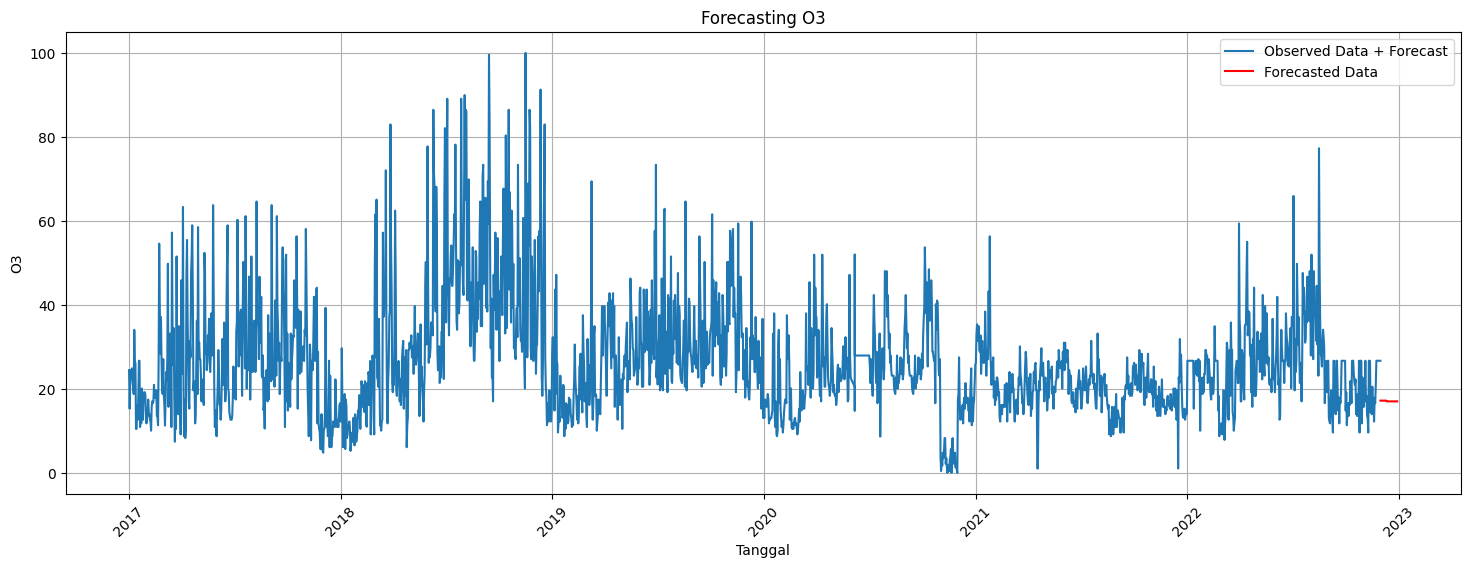

In [117]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['O3'].min()
max_par = DKI2['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.059
MSE: 0.003
MAE: 0.053
R-Squared: -0.104
       Tanggal         O3
0   2022-11-30  22.358079
1   2022-12-01  22.358079
2   2022-12-02  22.358079
3   2022-12-03  22.358079
4   2022-12-04  22.358079
5   2022-12-05  22.358079
6   2022-12-06  22.358079
7   2022-12-07  22.358079
8   2022-12-08  22.358079
9   2022-12-09  22.358079
10  2022-12-10  22.358079
11  2022-12-11  22.358079
12  2022-12-12  22.358079
13  2022-12-13  22.358079
14  2022-12-14  22.358079
15  2022-12-15  22.358079
16  2022-12-16  22.358079
17  2022-12-17  22.358079
18  2022-12-18  22.358079
19  2022-12-19  22.358079
20  2022-12-20  22.358079
21  2022-12-21  22.358079
22  2022-12-22  22.358079
23  2022-12-23  22.358079
24  2022-12-24  22.358079
25  2022-12-25  22.358079
26  2022-12-26  22.358079
27  2022-12-27  22.358079
28  2022-12-28  22.358079
29  2022-12-29  22.358079


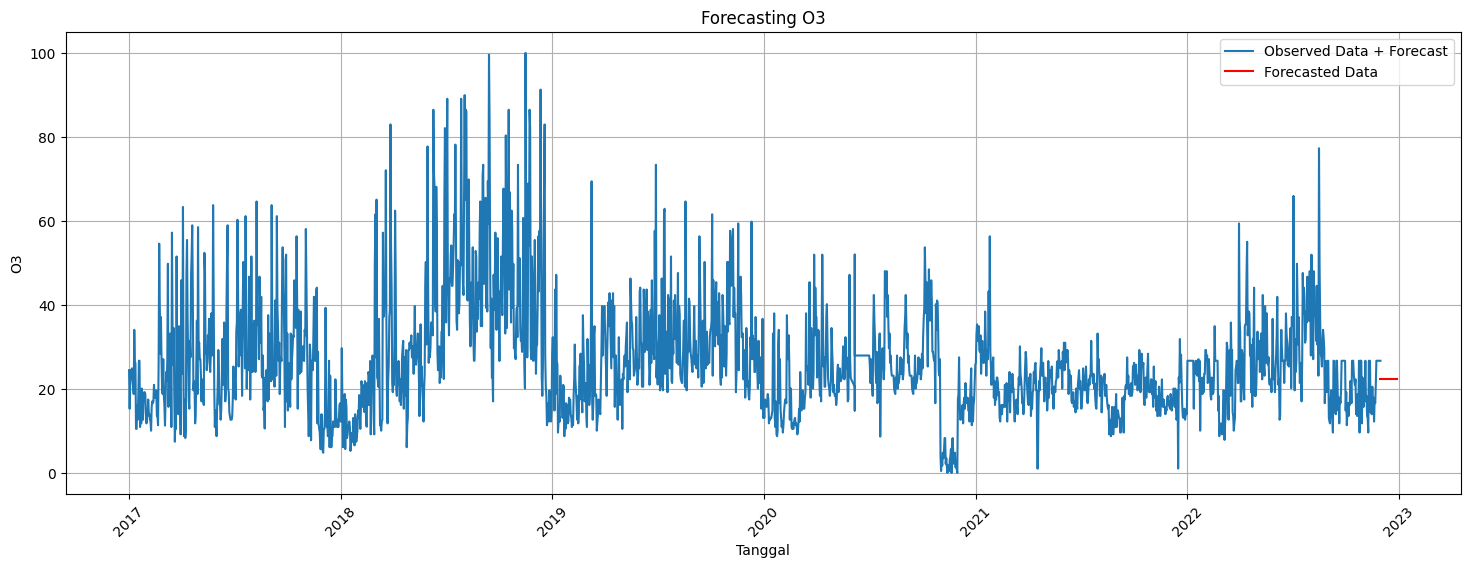

In [119]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['O3'].min()
max_par = DKI2['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.058
MSE: 0.003
MAE: 0.053
R-Squared: -0.094
       Tanggal         O3
0   2022-11-30  22.270742
1   2022-12-01  22.270742
2   2022-12-02  22.270742
3   2022-12-03  22.270742
4   2022-12-04  22.270742
5   2022-12-05  22.270742
6   2022-12-06  22.270742
7   2022-12-07  22.270742
8   2022-12-08  22.270742
9   2022-12-09  22.270742
10  2022-12-10  22.270742
11  2022-12-11  22.270742
12  2022-12-12  22.270742
13  2022-12-13  22.270742
14  2022-12-14  22.270742
15  2022-12-15  22.270742
16  2022-12-16  22.270742
17  2022-12-17  22.270742
18  2022-12-18  22.270742
19  2022-12-19  22.270742
20  2022-12-20  22.270742
21  2022-12-21  22.270742
22  2022-12-22  22.270742
23  2022-12-23  22.270742
24  2022-12-24  22.270742
25  2022-12-25  22.270742
26  2022-12-26  22.270742
27  2022-12-27  22.270742
28  2022-12-28  22.270742
29  2022-12-29  22.270742


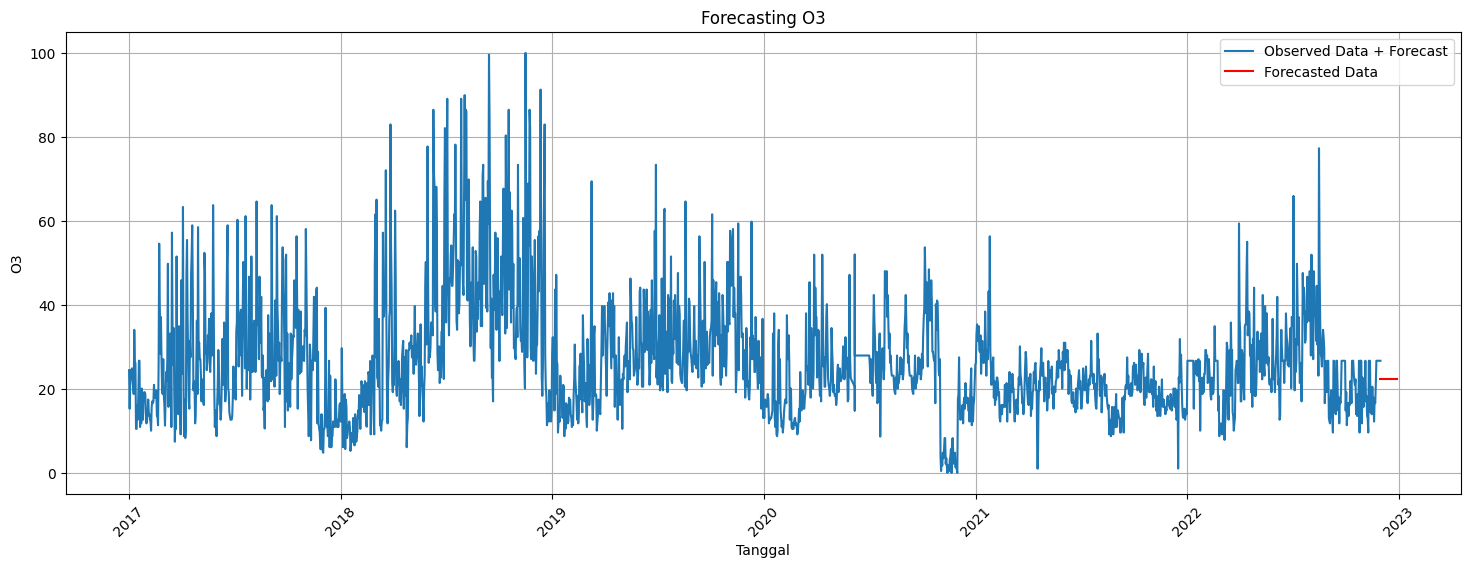

In [121]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
